In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
import matplotlib.pyplot as plt
import pandas as pd
import re
import spacy

[nltk_data] Downloading package punkt to /home/oumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/oumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
sculptors = pd.read_csv('Text_Data/biography_sculptor.csv')
sculptors.head()

,Category,Name,Content
0,Sculptors,Wäinö Aaltonen,Wäinö Valdemar Aaltonen (8 March 1894 – 30 May...
1,Sculptors,Johannes Josephus Aarts,"Johannes Josephus Aarts (18 August 1871, in Th..."
2,Sculptors,Magdalena Abakanowicz,Magdalena Abakanowicz (Polish pronunciation: [...
3,Sculptors,Elfriede Abbe,"Elfriede Martha Abbe (February 6, 1919 – Decem..."
4,Sculptors,Louise Abbéma,Louise Abbéma (30 October 1853 – 29 July 1927)...


In [100]:
cs = pd.read_csv('Text_Data/biography_cs.csv')
cs.head()

,Category,Name,Content
0,Computer_Scientists,Atta ur Rehman Khan,Atta ur Rehman Khan (Urdu: عطا الرحمن خان) is ...
1,Computer_Scientists,Wil van der Aalst,Willibrordus Martinus Pancratius van der Aalst...
2,Computer_Scientists,Scott Aaronson,"Scott Joel Aaronson (born May 21, 1981) is an ..."
3,Computer_Scientists,Rediet Abebe,Rediet Abebe (Amharic: ረድኤት አበበ) is an Ethiopi...
4,Computer_Scientists,Hal Abelson,"Harold Abelson (born April 26, 1947) is an Ame..."


In [5]:
import string
# punctuation = string.punctuation

## Preprocessing

In [42]:
def remove_stopwords(dataframe):
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    dataframe['Content'] = dataframe['Content'].apply(lambda x: x.lower())
    dataframe['Content'] = dataframe['Content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)])) 
    return dataframe


In [43]:
sculptors = remove_stopwords(sculptors)
# sculptors.to_csv('cleaned_sculptors.csv', index=False) 
sculptors.head()


,Category,Name,Content
0,Sculptors,Wäinö Aaltonen,wäinö valdemar aaltonen (8 march 1894 – 30 may...
1,Sculptors,Johannes Josephus Aarts,"johannes josephus aarts (18 august 1871, hague..."
2,Sculptors,Magdalena Abakanowicz,magdalena abakanowicz (polish pronunciation: [...
3,Sculptors,Elfriede Abbe,"elfriede martha abbe (february 6, 1919 – decem..."
4,Sculptors,Louise Abbéma,louise abbéma (30 october 1853 – 29 july 1927)...


In [101]:
computer_sc = remove_stopwords(cs)
computer_sc.to_csv('cleaned_computer_sc.csv', index=False) 
computer_sc.head()

,Category,Name,Content
0,Computer_Scientists,Atta ur Rehman Khan,atta ur rehman khan (urdu: عطا الرحمن خان) com...
1,Computer_Scientists,Wil van der Aalst,willibrordus martinus pancratius van der aalst...
2,Computer_Scientists,Scott Aaronson,"scott joel aaronson (born may 21, 1981) americ..."
3,Computer_Scientists,Rediet Abebe,rediet abebe (amharic: ረድኤት አበበ) ethiopian com...
4,Computer_Scientists,Hal Abelson,"harold abelson (born april 26, 1947) american ..."


In [45]:
def most_frequent_words(dataframe, n):
    # get most frequent words
    # remove ==
    patern = r'[=–]'
    dataframe['Content'] = dataframe['Content'].apply(lambda x: re.sub(patern, ' ', x))
    all_words = ' '.join(dataframe['Content']).split()
    fdist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame(fdist.most_common(n), columns=["Word", "Frequency"])
    return words_df


print(most_frequent_words(sculptors, 50))


          Word  Frequency
0          art        395
1         work        252
2       museum        204
3          new        196
4         also        195
5    sculpture        190
6        works        190
7           de        177
8         arts        126
9        first        118
10  sculptures        118
11      artist        105
12  university        102
13        born         98
14     gallery         98
15    american         95
16         one         90
17        life         90
18    sculptor         89
19        art,         88
20  references         86
21      church         86
22        made         84
23  exhibition         83
24        york         82
25       known         81
26         two         80
27     academy         79
28    national         79
29         san         78
30       early         76
31       years         76
32        fine         75
33      public         75
34        isbn         74
35      school         71
36      design         71
37        ti

In [10]:
print(most_frequent_words(computer_sc, 50))

             Word  Frequency
0        computer        628
1      university        477
2         science        375
3           first        274
4        research        254
5            also        253
6        software        238
7         systems        216
8           award        216
9            work        216
10    engineering        213
11      computing        207
12        babbage        196
13          bezos        185
14     technology        182
15      botvinnik        182
16      professor        174
17          world        168
18         system        167
19    programming        161
20            new        158
21    information        154
22    mathematics        152
23            one        147
24           isbn        145
25       received        135
26           born        131
27         school        130
28        project        128
29          later        128
30           data        127
31  international        123
32    development        122
33           t

### World cloud

In [11]:
from wordcloud import WordCloud
def display_wordcloud(dataframe):
    # display wordcloud
    all_words = ' '.join(dataframe['Content'])
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(all_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    return wordcloud
   

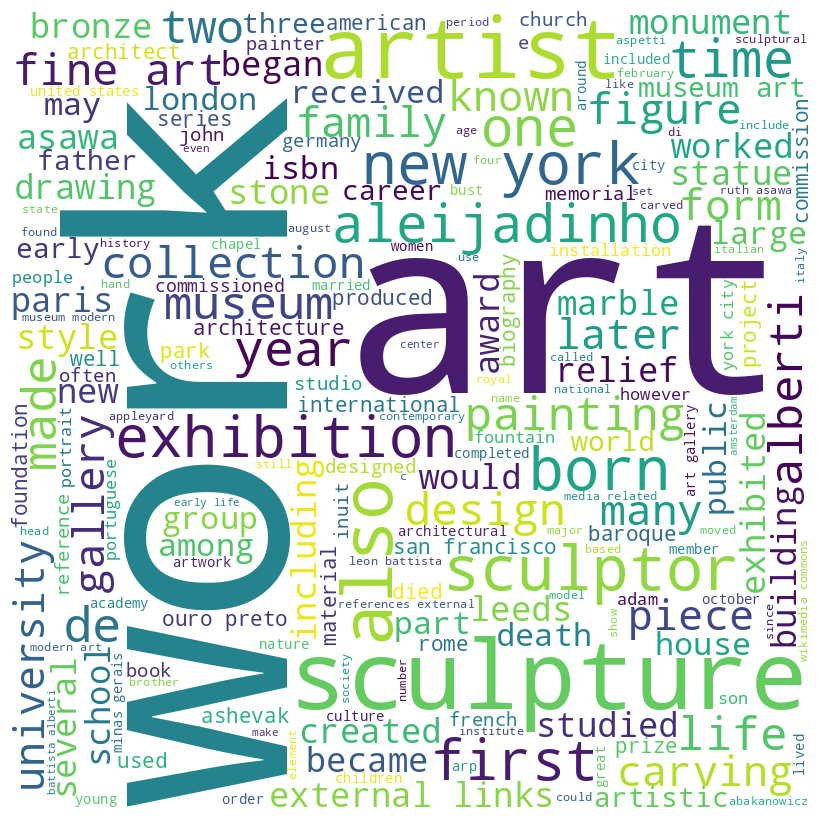

In [12]:
print(display_wordcloud(sculptors))

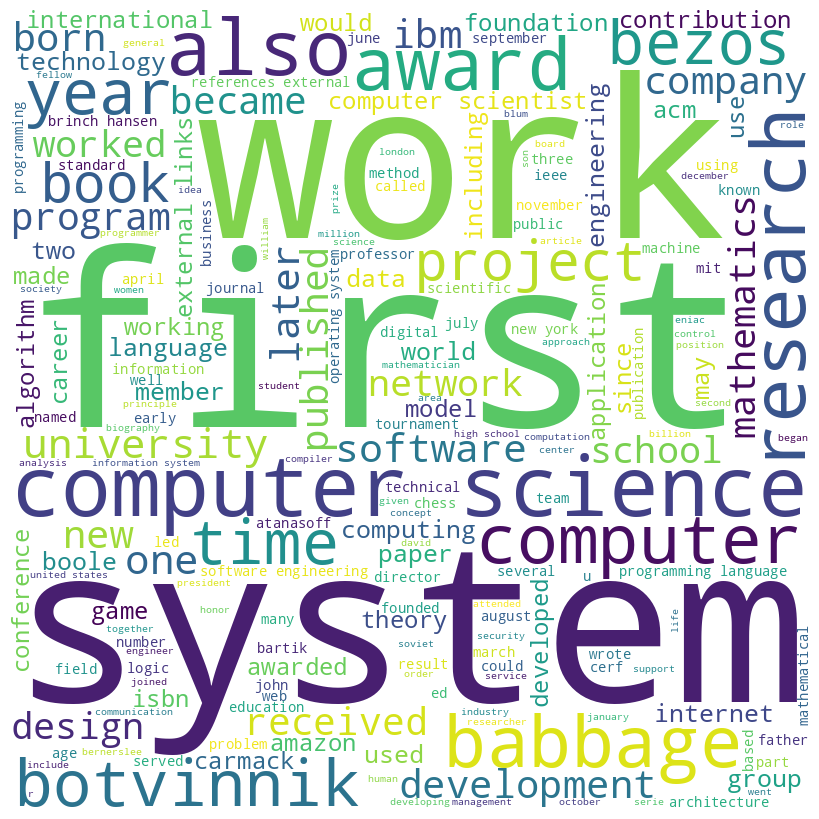

In [13]:
print(display_wordcloud(computer_sc))

### Sentences 
 

In [74]:
def sentence_segmentation(dataframe, category):
    # Load spacy model
    nlp = spacy.load('en_core_web_sm')
    
    # List to store all authors
    all_authors = []

    # Iterate over each row in the dataframe
    for i, row in dataframe.iterrows():
        author = row['Name']
        text = nlp(row['Content'])

        # Extract sentences and count them
        
        sentences = [sent.text for sent in text.sents if sent.text.strip()]
        sentence_count = len(sentences)

       
        all_authors.append((author, sentence_count, sentences))

    # Create a dataframe
    df = pd.DataFrame(all_authors, columns=['Author', 'Sentence Count', 'Sentences'])

    # Calculate statistics
    min = df['Sentence Count'].min()
    max = df['Sentence Count'].max()
    avg = df['Sentence Count'].mean()
    print("Min: ", min)
    print("Max: ", max)
    print("Avg: ", avg)

    # Display distribution
    plt.hist(df['Sentence Count'])
    plt.title(f'Sentence Count Distribution for {category}')
    plt.show()
    plt.boxplot(df['Sentence Count'])
    plt.title(f'Box plot for Sentence Distribution of {category}')
    plt.show()
    return df


Min:  1
Max:  24
Avg:  3.6315789473684212


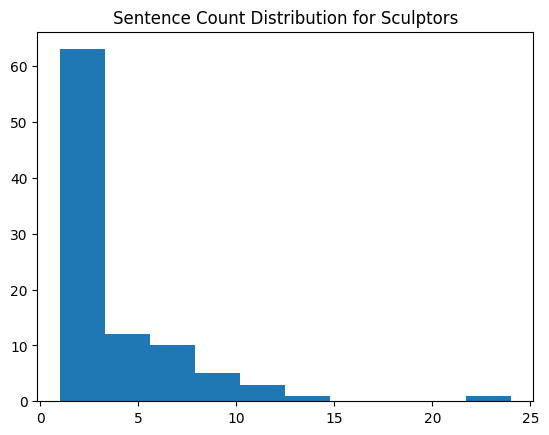

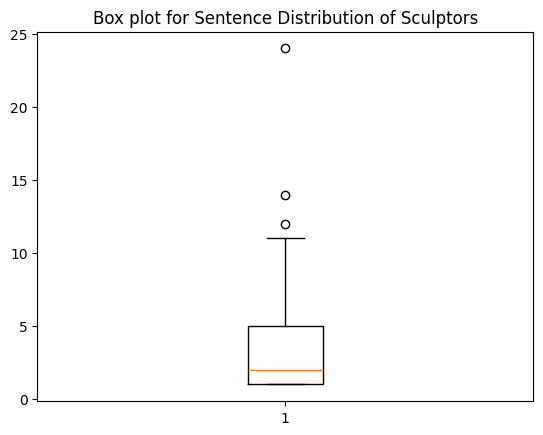

,Author,Sentence Count,Sentences
0,Wäinö Aaltonen,2,[wäinö valdemar aaltonen 8 march 1894 30 ma...
1,Johannes Josephus Aarts,2,[johannes josephus aarts 18 august 1871 hagu...
2,Magdalena Abakanowicz,8,[magdalena abakanowicz polish pronunciation ...
3,Elfriede Abbe,4,[elfriede martha abbe february 6 1919 dece...
4,Louise Abbéma,4,[louise abbéma 30 october 1853 29 july 1927...


In [75]:
sculptors_sentence = sentence_segmentation(sculptors, 'Sculptors')
sculptors_sentence.head()


Min:  1
Max:  385
Avg:  53.02127659574468


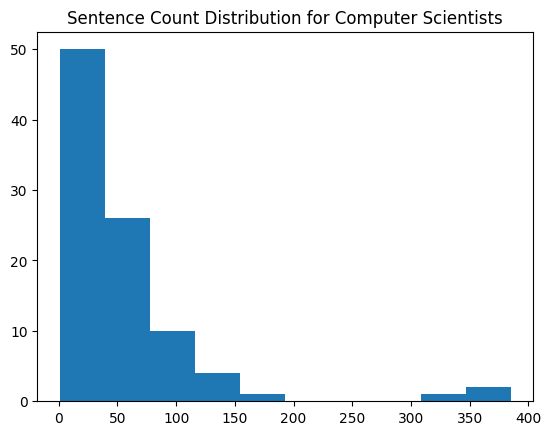

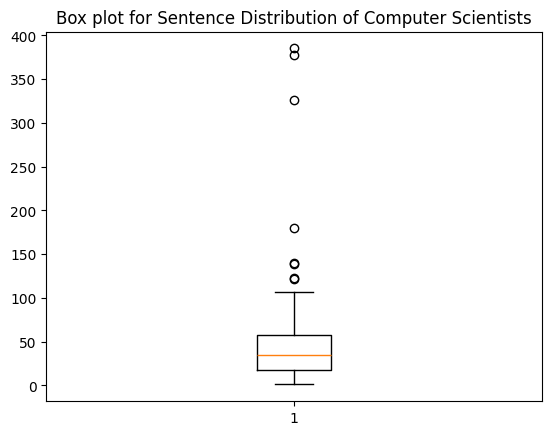

,Author,Sentence Count,Sentences
0,Atta ur Rehman Khan,139,[atta ur rehman khan (urdu: عطا الرحمن خان) co...
1,Wil van der Aalst,47,[willibrordus martinus pancratius van der aals...
2,Scott Aaronson,41,"[scott joel aaronson (born may 21, 1981) ameri..."
3,Rediet Abebe,53,[rediet abebe (amharic: ረድኤት አበበ) ethiopian co...
4,Hal Abelson,35,"[harold abelson (born april 26, 1947) american..."


In [53]:
sculptors_sentence = sentence_segmentation(computer_sc, 'Computer Scientists')
sculptors_sentence.head()

In [28]:
print(sculptors_sentence['Sentences'])

0     [atta ur rehman khan urdu عطا الرحمن خان compu...
1     [willibrordus martinus pancratius van der aals...
2     [scott joel aaronson born may 21 1981 american...
3     [rediet abebe amharic ረድኤት አበበ ethiopian compu...
4     [harold abelson born april 26 1947 american ma...
                            ...                        
89    [tracy chou born 1987 software engineer advoca...
90    [alonzo church june 14 1903   august 11 1995 a...
91    [alberto ciaramella born 1947 italian computer...
92    [edmund melson clarke jr july 27 1945   decemb...
93    [john cocke may refer john cocke computer scie...
Name: Sentences, Length: 94, dtype: object


## Bigrams

In [76]:
def bigrams(dataframe, category):
    all_bigrams = []
    # 
    # dataframe['Content'] = dataframe['Content'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    for i, row in dataframe.iterrows():
        text = nltk.word_tokenize(row['Content'])
        bigrams = list(nltk.bigrams(text))
        all_bigrams.extend(bigrams)
    print(f'Total number of bigrams for {category}:', len(all_bigrams))

    # Get 50 most common bigrams
    fdist = nltk.FreqDist(all_bigrams)
    bigrams_df = pd.DataFrame(fdist.most_common(50), columns=["Bigram", "Frequency"])
    return bigrams_df


In [77]:
print(bigrams(sculptors, 'Sculptor'))

Total number of bigrams for Sculptor: 48553
                    Bigram  Frequency
0              (new, york)        121
1        (external, links)         61
2             (fine, arts)         56
3            (museum, art)         50
4            (ouro, preto)         47
5         (san, francisco)         45
6                (s, work)         44
7         (in, portuguese)         37
8             (york, city)         36
9         (united, states)         34
10          (art, gallery)         34
11         (minas, gerais)         33
12           (modern, art)         30
13  (references, external)         29
14        (media, related)         29
15    (wikimedia, commons)         29
16        (leon, battista)         29
17           (ruth, asawa)         29
18        (museum, modern)         28
19            (ashevak, s)         28
20           (early, life)         27
21             (isbn, 978)         27
22     (battista, alberti)         27
23                  (d, c)         23
24    

In [70]:
print(bigrams(computer_sc, 'Computer Scientist'))

Total number of bigrams for Computer Scientist: 66434
                         Bigram  Frequency
0           (computer, science)        232
1             (external, links)         73
2         (computer, scientist)         71
3                   (isbn, 978)         69
4        (references, external)         58
5       (software, engineering)         58
6                     (isbn, 0)         57
7                (berners, lee)         56
8              (brinch, hansen)         54
9                   (new, york)         51
10                    (doi, 10)         43
11       (information, systems)         42
12                 (babbage, s)         42
13               (botvinnik, s)         42
14             (united, states)         37
15               (high, school)         37
16                (world, wide)         35
17                  (wide, web)         35
18                      (ph, d)         34
19      (programming, language)         34
20           (charles, babbage)         34


In [92]:
import seaborn as sns

In [107]:
def bigrams_per_sentence(dataframe, category):
    # Load spacy model
    nlp = spacy.load('en_core_web_sm')
    
    # List to store all authors
    all_authors = []

    # Iterate over each row in the dataframe
    for i, row in dataframe.iterrows():
        author = row['Name']
        text = nlp(row['Content'])

        # Extract sentences and count them
        
        sentences = [sent.text for sent in text.sents if sent.text.strip()]

        for sentence in sentences:
            text = nltk.word_tokenize(sentence)
            bigrams = list(nltk.bigrams(text))
            bigrams_count = len(bigrams)
            all_authors.append((author, sentence, bigrams, bigrams_count))


    # Create a dataframe (mainly for statistics)
    df = pd.DataFrame(all_authors, columns=['Author', 'Sentence', 'Bigrams', 'Bigram Count'])

    min = df['Bigram Count'].min()
    max = df['Bigram Count'].max()
    avg = df['Bigram Count'].mean()

    print(f"Min bigrams per sentnce for {category}: ", min)
    print(f"Max: bigrams per sentence for {category} ", max)
    print(f"Avg: bigrams per sentence for {category}", avg)

    plt.hist(df['Bigram Count'])
    plt.title(f'Bigram Count Distribution for {category}')
    plt.show()
    return df
        

Min bigrams per sentnce for Sculptors:  0
Max: bigrams per sentence for Sculptors  1150
Avg: bigrams per sentence for Sculptors 140.0086956521739


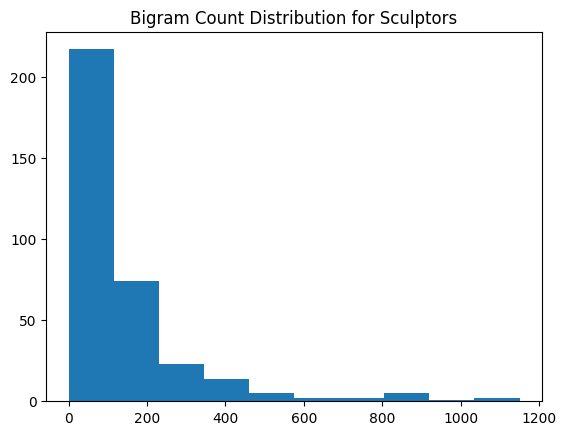

In [108]:
sculptors_bigrams = bigrams_per_sentence(sculptors, 'Sculptors')

Min bigrams per sentnce for Computer Scientists:  0
Max: bigrams per sentence for Computer Scientists  398
Avg: bigrams per sentence for Computer Scientists 15.55236757624398


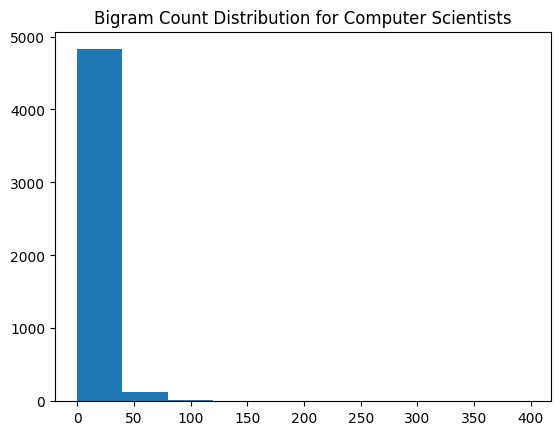

In [109]:
computer_bigrams = bigrams_per_sentence(computer_sc, 'Computer Scientists')